<h1>Smoker Prediction Using Bayesian Network</h1>

<h3>Kelas AI/ML B</h3>
<ul>
    <li>Wahyu Andhika Rizaldi - 5027211003</li>
    <li>Athallah Narda Wiyoga - 5027211041</li>
</ul>

<h3>Dataset Source: </h3>
<a>https://www.kaggle.com/datasets/gauravduttakiit/smoker-status-prediction</a>

<h3>Requirements:</h3>
<ul>
    <li>bnlearn</li>
    <li>Seaborn</li>
    <li>Sklearn</li>
    <li>Matplotlib</li>
    <li>Download Smoker Dataset</li>
</ul>


<h4>Install dependencies</h5>

In [ ]:
%pip install bnlearn

<h4>Importing libraries</h4>

In [12]:
import numpy as np
import pandas as pd
import bnlearn as bn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

<h4>Reading the data</h4>

In [13]:
train = pd.read_csv('C:/Users/wahyu/Documents/Sem5/AI/Smoker-Prediction/dataset/train_smoker.csv')
test = pd.read_csv('C:/Users/wahyu/Documents/Sem5/AI/Smoker-Prediction/dataset/test_smoker.csv')

<h4>Analysing the data</h4>

In [14]:
train.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,35,170,85,97.0,0.9,0.9,1,1,118,78,...,70,142,19.8,1,1.0,61,115,125,1,1
1,20,175,110,110.0,0.7,0.9,1,1,119,79,...,71,114,15.9,1,1.1,19,25,30,1,0
2,45,155,65,86.0,0.9,0.9,1,1,110,80,...,57,112,13.7,3,0.6,1090,1400,276,0,0
3,45,165,80,94.0,0.8,0.7,1,1,158,88,...,46,91,16.9,1,0.9,32,36,36,0,0
4,20,165,60,81.0,1.5,0.1,1,1,109,64,...,47,92,14.9,1,1.2,26,28,15,0,0


In [15]:
test.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,40,170,65,75.1,1.0,0.9,1,1,120,70,...,260,41,132,15.7,1,0.8,24,26,32,0
1,45,170,75,89.0,0.7,1.2,1,1,100,67,...,345,49,140,15.7,1,1.1,26,28,138,0
2,30,180,90,94.0,1.0,0.8,1,1,115,72,...,103,53,103,13.5,1,1.0,19,29,30,0
3,60,170,50,73.0,0.5,0.7,1,1,118,78,...,70,65,108,14.1,1,1.3,31,28,33,0
4,30,170,65,78.0,1.5,1.0,1,1,110,70,...,210,45,103,14.7,1,0.8,21,21,19,0


<h4>Preparing the data</h4>

In [16]:
dfhot_train, dfnum_train = bn.df2onehot(train)
dfhot_test, dfnum_test = bn.df2onehot(test)


[df2onehot] >Auto detecting dtypes.


100%|██████████| 23/23 [00:01<00:00, 19.08it/s]


[df2onehot] >Set dtypes in dataframe..


[df2onehot]: 100%|██████████| 23/23 [00:01<00:00, 15.53it/s]


[df2onehot] >Total onehot features: 1507

[df2onehot] >Auto detecting dtypes.


100%|██████████| 22/22 [00:00<00:00, 40.87it/s]


[df2onehot] >Set dtypes in dataframe..


[df2onehot]: 100%|██████████| 22/22 [00:00<00:00, 28.74it/s]


[df2onehot] >Total onehot features: 1229


In [17]:
dfnum_target = dfnum_train.pop('smoking')

<h4>Making the Bayesian Network</h4>

In [18]:
Xtrain, Xval, Ztrain, Zval = train_test_split(dfnum_train, dfnum_target, test_size=0.2, random_state=0)
valid = pd.concat([Xval, Zval], axis='columns')
dfnum = pd.concat([Xtrain, Ztrain], axis='columns')

[bnlearn] >Computing best DAG using [nb]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Compute edge strength with [chi_square]
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


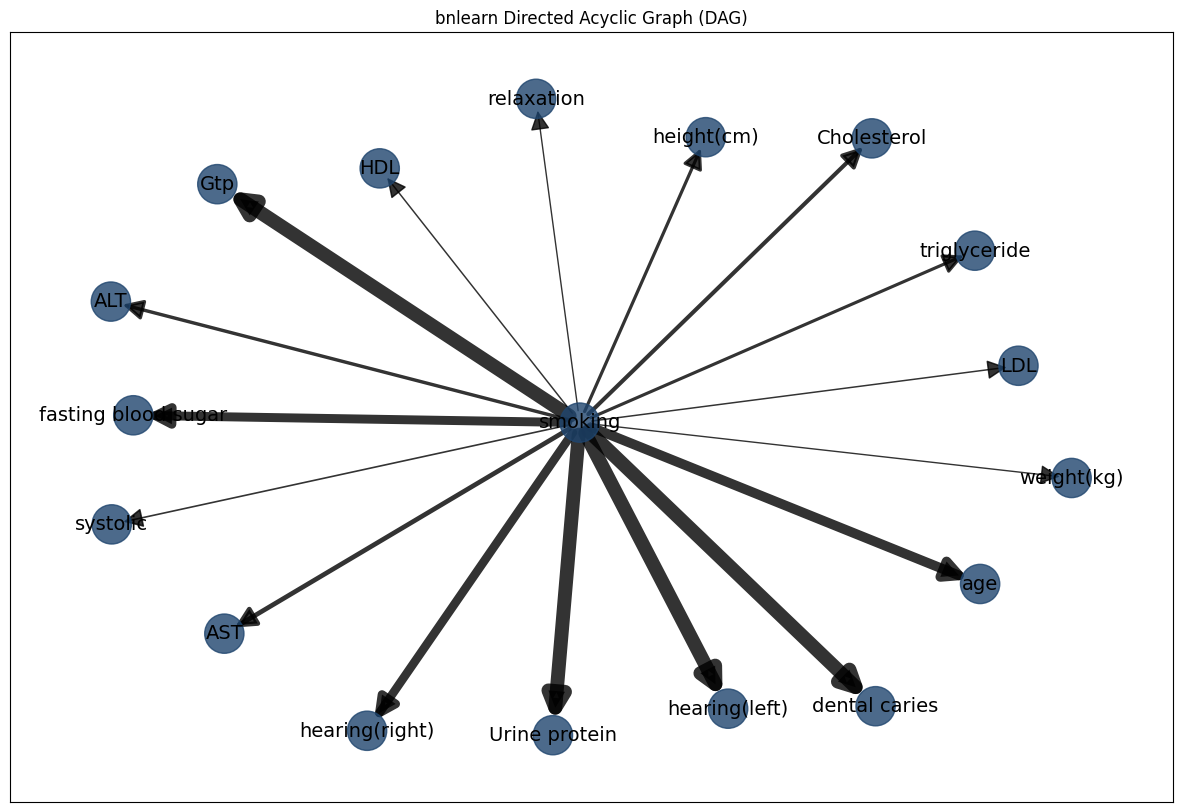

In [19]:
# Structure learning
DAG = bn.structure_learning.fit(dfnum, methodtype='nb', root_node='smoking', verbose=3)

# Compute edge strength using chi-square independence test
model = bn.independence_test(DAG, dfnum, prune=False)

# Plot
G = bn.plot(model)

In [20]:
# Parameter learning
model = bn.parameter_learning.fit(model, dfnum, verbose=3);

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.models.NaiveBayes.NaiveBayes'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of smoking:
+------------+----------+
| smoking(0) | 0.627303 |
+------------+----------+
| smoking(1) | 0.372697 |
+------------+----------+
[bnlearn] >CPD of age:
+---------+-----------------------+-----------------------+
| smoking | smoking(0)            | smoking(1)            |
+---------+-----------------------+-----------------------+
| age(1)  | 0.02430361476471129   | 0.04174010384413851   |
+---------+-----------------------+-----------------------+
| age(2)  | 0.05431698705929798   | 0.07958605249368834   |
+---------+-----------------------+-----------------------+
| age(3)  | 0.060408810148793304  | 0.09459105416091075   |
+---------+-----------------------+-----------------------+
| age(4)  | 0.0589229996391603    | 0.11576477873576904   |
+---------

<h4>Get prediction and accuracy</h4>

In [21]:
# function Accuracy
def get_acc(model, df, col):
    # Get accuracy score by the model for the validation dataset df with target col
    pred = bn.predict(model, df, variables=[col])
    print(pred)
    acc = accuracy_score(df[col], pred[col])
    print('Accuracy -', acc)
    return acc

In [22]:
# Get score of the model1
acc1 = get_acc(model, valid, 'smoking')

[bnlearn]> Remaining columns for inference: 17


100%|██████████| 7608/7608 [00:23<00:00, 330.19it/s]

      smoking         p
0           1  0.993984
1           0  0.999091
2           0  0.637905
3           0  0.920477
4           1  0.949895
...       ...       ...
7792        1  0.789936
7793        1  0.916534
7794        0  0.996926
7795        0  0.771176
7796        0  0.540248

[7797 rows x 2 columns]
Accuracy - 0.702321405668847
